In [47]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report

In [2]:
#read the dataset
train_dataset=pd.read_csv("Datasets/wildfires_training.csv")
test_dataset=pd.read_csv("Datasets/wildfires_test.csv")

In [3]:
print(train_dataset.size,len(train_dataset.columns))
print(test_dataset.size,len(test_dataset.columns))

1540 10
500 10


In [4]:
#visualize firtst few rows of data
print(train_dataset.head())
print(test_dataset.head())

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    28        59       0.0          8.06           3.47    1   
1   no  2010    30        61       1.3          8.17           4.03    2   
2   no  2009    26        83      13.1          8.08           3.59    3   
3   no  2017    25        87       2.5          7.18           2.42    4   
4   no  2014    28        77       0.0         14.98           4.63    5   

   month  wind_speed  
0      6          19  
1      6          13  
2      6          22  
3      6          15  
4      6          18  
  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    33        68       4.5          9.12           5.09   19   
1  yes  2009    28        56       0.0         38.17          21.21   12   
2   no  2017    30        64       0.6         15.38           6.24   24   
3   no  2007    23        74       8.3          7.36           2.27   14   
4   no  2017    31       

In [5]:
#check for null values in the dataset
print(train_dataset.isnull().sum())
print(test_dataset.isnull().sum())

fire             0
year             0
temp             0
humidity         0
rainfall         0
drought_code     0
buildup_index    0
day              0
month            0
wind_speed       0
dtype: int64
fire             0
year             0
temp             0
humidity         0
rainfall         0
drought_code     0
buildup_index    0
day              0
month            0
wind_speed       0
dtype: int64


In [6]:
y_train = train_dataset["fire"]
x_train = train_dataset.drop(labels="fire", axis=1, inplace=False)
y_test = test_dataset["fire"]
x_test = test_dataset.drop(labels="fire", axis=1, inplace=False)

print(len(x_train.columns))
print(len(x_test.columns))


9
9


In [7]:
#brief data description
print(x_train.describe())

              year        temp    humidity    rainfall  drought_code  \
count   154.000000  154.000000  154.000000  154.000000    154.000000   
mean   2012.058442   31.545455   63.071429    0.855844     48.146299   
std       3.355294    3.952481   16.038804    2.246798     47.348331   
min    2007.000000   22.000000   21.000000    0.000000      7.180000   
25%    2009.000000   29.000000   52.000000    0.000000      9.720000   
50%    2012.000000   31.000000   64.000000    0.000000     31.330000   
75%    2015.000000   34.000000   77.000000    0.600000     65.257500   
max    2017.000000   43.000000   92.000000   16.800000    221.350000   

       buildup_index         day       month  wind_speed  
count     154.000000  154.000000  154.000000  154.000000  
mean       16.285065   15.077922    7.603896   16.383117  
std        14.346991    8.085760    1.217620    3.218001  
min         1.320000    1.000000    6.000000    6.000000  
25%         5.797500    9.000000    6.000000   14.000000

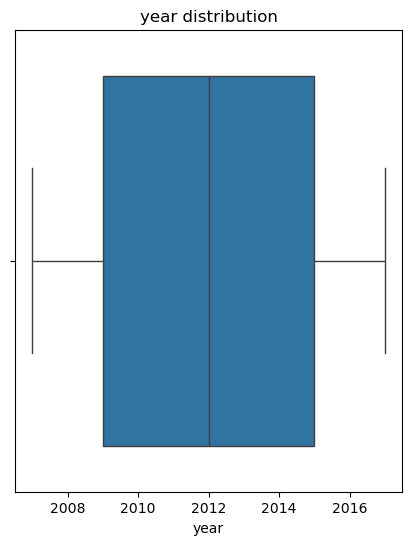

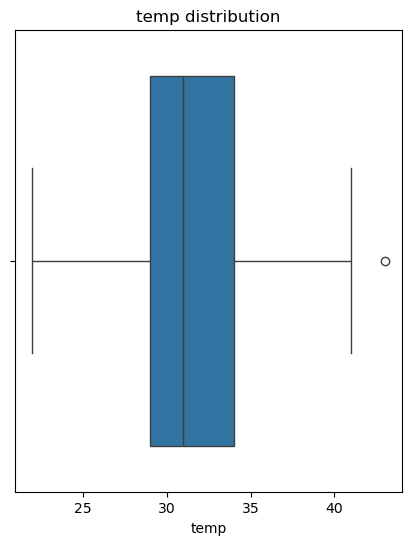

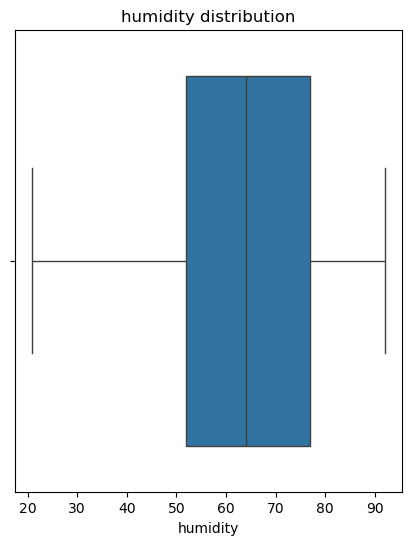

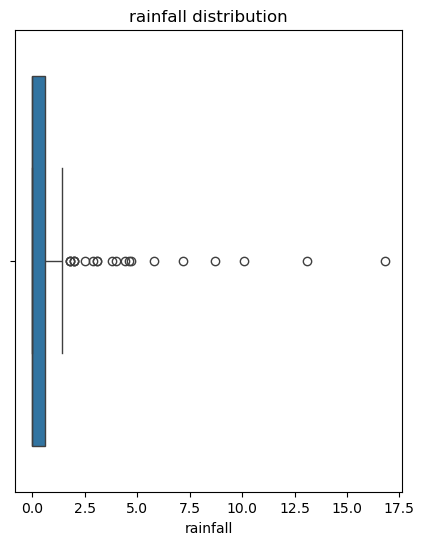

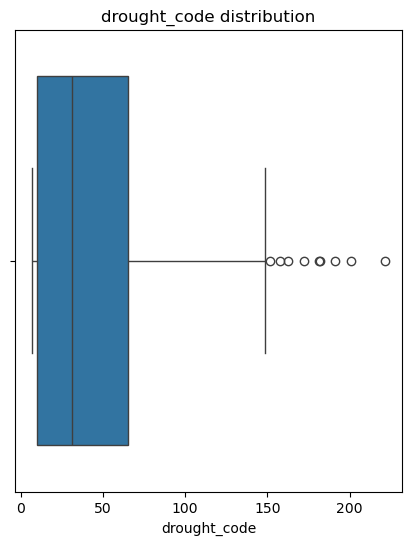

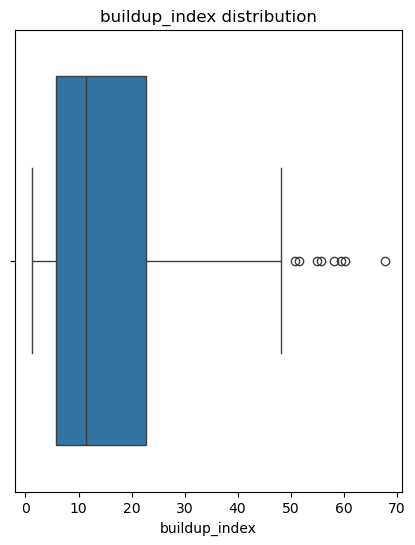

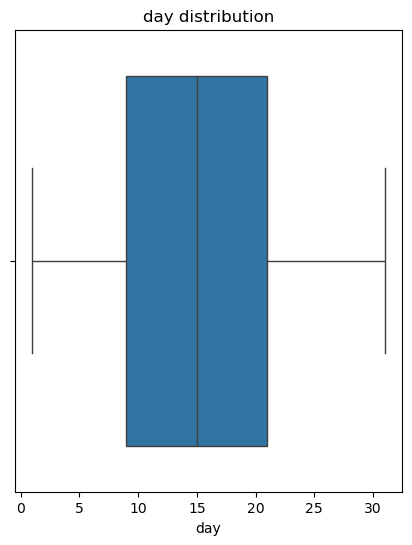

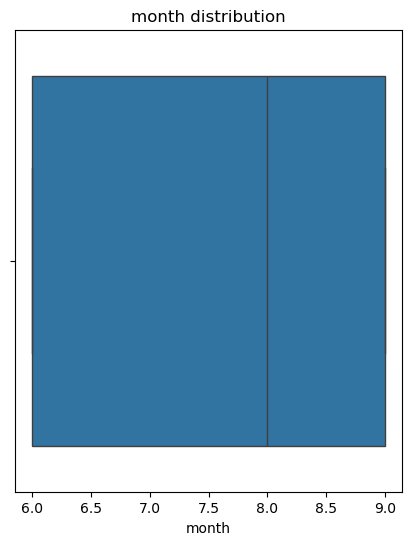

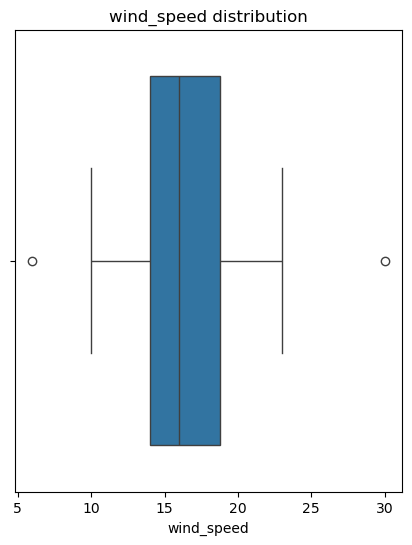

In [16]:
#visualization of the data 
for col in x_train.columns:
    plt.figure(figsize =(5,6))
    sns.boxplot(x=x_train[col])
    plt.title(f"{col} distribution")
    plt.show()

In [24]:
#base_model_testing
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

# Testing predictions
y_pred_test = model.predict(x_test)
print("Testing classification report:\n")
print(classification_report(y_test, y_pred_test))

Testing classification report:

              precision    recall  f1-score   support

          no       0.77      0.91      0.83        22
         yes       0.92      0.79      0.85        28

    accuracy                           0.84        50
   macro avg       0.84      0.85      0.84        50
weighted avg       0.85      0.84      0.84        50



In [55]:
#hyperparamater tuning 
min_samples_split = [2,4,6,8,10]
max_depth = [None,5,10]
best_score = 0
result_list = []
for s in min_samples_split :
    for d in max_depth:
        model = RandomForestClassifier(min_samples_split=s,max_depth=d,random_state=42)
        model.fit(x_train,y_train)
        y_pred_test = model.predict(x_test)
        score = accuracy_score(y_test, y_pred_test)
        precision = precision_score(y_test,y_pred_test, average='macro')
        recall = recall_score(y_test,y_pred_test,pos_label="yes")
        result_list.append({"min_samples_split": s,"max_depth":d,"score":score,"precision":f"{precision:.2f}","recall":f"{recall:.2f}"})

df_results = pd.DataFrame(result_list).sort_values(by='score', ascending=False)
print(df_results)

    min_samples_split  max_depth  score precision recall
1                   2        5.0   0.86      0.86   0.82
5                   4       10.0   0.86      0.86   0.82
3                   4        NaN   0.86      0.86   0.82
2                   2       10.0   0.84      0.84   0.79
0                   2        NaN   0.84      0.84   0.79
4                   4        5.0   0.84      0.84   0.82
6                   6        NaN   0.84      0.84   0.79
7                   6        5.0   0.84      0.84   0.82
8                   6       10.0   0.84      0.84   0.79
10                  8        5.0   0.84      0.84   0.79
13                 10        5.0   0.84      0.84   0.79
9                   8        NaN   0.82      0.83   0.75
11                  8       10.0   0.82      0.83   0.75
12                 10        NaN   0.78      0.79   0.71
14                 10       10.0   0.78      0.79   0.71
